In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("results/survey.csv")
df = df.sort_values("gamma")
loss = "poisson_nll"
model = "neural_network"
df = df[df.model_class == model]
df_cond_weights = df[(df.method == "ru_regression") & (df.loss == loss) & (df.use_train_weights==True)]
df_cond = df[(df.method == "ru_regression") & (df.loss == loss) & (df.use_train_weights==False)]
df_joint = df[(df.method == "joint_ru_regression") & (df.loss == loss)]
df

,dataset,method,gamma,loss,use_train_weights,model_class,seed,test_ru_loss,test_ru_loss_se,test_loss,test_loss_se,test_mse,test_mse_se,hps_ru_loss,hps_ru_loss_se,hps_mse,hps_mse_se,hps_loss,hps_loss_se
1,survey,ru_regression,1.0,poisson_nll,False,neural_network,0,0.757331,0.003076,0.757331,0.003076,4.372649,0.009112,-0.620860,0.006600,10.602229,0.024680,-0.620860,0.006600
9,survey,joint_ru_regression,1.0,poisson_nll,False,neural_network,0,0.760203,0.003083,0.760203,0.003083,4.394821,0.009127,-0.620841,0.006599,10.601858,0.024694,-0.620841,0.006599
10,survey,ru_regression,1.0,poisson_nll,True,neural_network,0,0.739677,0.003032,0.739677,0.003032,4.196135,0.008552,-0.613379,0.006555,10.643874,0.024839,-0.613379,0.006555
2,survey,ru_regression,1.5,poisson_nll,False,neural_network,0,0.943306,0.002196,0.553319,0.002327,2.675359,0.008250,0.281251,0.004098,11.539244,0.032081,-0.441051,0.005026
8,survey,joint_ru_regression,1.5,poisson_nll,False,neural_network,0,0.872343,0.001864,0.571362,0.002396,2.789591,0.008398,0.307974,0.003874,11.447925,0.031722,-0.448053,0.005152
11,survey,ru_regression,1.5,poisson_nll,True,neural_network,0,0.954707,0.002232,0.558631,0.002362,2.698353,0.008100,0.288588,0.004217,11.448793,0.031578,-0.461766,0.005132
3,survey,ru_regression,2.0,poisson_nll,False,neural_network,0,1.006842,0.001682,0.584869,0.001909,2.638280,0.009633,0.660694,0.002889,12.740442,0.036443,-0.153418,0.004099
7,survey,joint_ru_regression,2.0,poisson_nll,False,neural_network,0,0.924968,0.001247,0.608808,0.001918,2.706541,0.009774,0.679497,0.002551,12.826093,0.036730,-0.116658,0.004101
12,survey,ru_regression,2.0,poisson_nll,True,neural_network,0,1.000349,0.001670,0.589979,0.001853,2.643625,0.009707,0.667216,0.002885,12.867444,0.036778,-0.125325,0.004006
5,survey,ru_regression,2.5,poisson_nll,False,neural_network,0,1.008747,0.001241,0.668314,0.001506,2.861679,0.010900,0.835388,0.002074,13.916533,0.039831,0.157420,0.003236


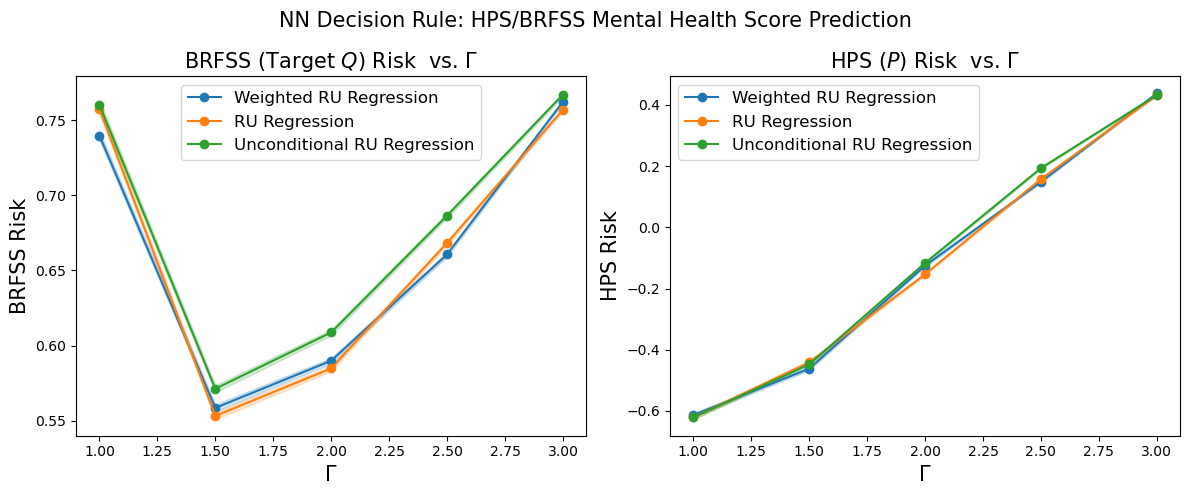

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fontsize=15

labels = ["test_loss", "hps_loss"]
for i in range(2):
    ax[i].plot(df_cond_weights["gamma"], df_cond_weights[labels[i]], label="Weighted RU Regression", c="tab:blue", marker="o")
    ax[i].fill_between(df_cond_weights["gamma"], df_cond_weights[labels[i]]- df_cond_weights[labels[i] + "_se"], 
                       df_cond_weights[labels[i]] + df_cond_weights[labels[i] + "_se"], alpha=0.2, color="tab:blue")
    ax[i].plot(df_cond["gamma"], df_cond[labels[i]], label="RU Regression", c="tab:orange", marker="o")
    ax[i].fill_between(df_cond["gamma"], df_cond[labels[i]]- df_cond[labels[i] + "_se"], 
                       df_cond[labels[i]] + df_cond[labels[i] + "_se"], alpha=0.2, color="tab:orange")
    ax[i].plot(df_joint["gamma"], df_joint[labels[i]], label="Unconditional RU Regression", c="tab:green", marker="o")
    ax[i].fill_between(df_joint["gamma"], df_joint[labels[i]]- df_joint[labels[i] + "_se"], 
                       df_joint[labels[i]] + df_joint[labels[i] + "_se"], alpha=0.2, color="tab:green")
    

    
ax[1].set_ylabel("HPS Risk", fontsize=fontsize)
ax[1].set_title("HPS ($P$) Risk " + " vs. $\Gamma$", fontsize=fontsize)

ax[0].set_ylabel("BRFSS Risk", fontsize=fontsize)
ax[0].set_title("BRFSS (Target $Q$) Risk " + " vs. $\Gamma$", fontsize=fontsize)

for i in range(len(ax)):
    ax[i].legend(fontsize=12)
    ax[i].set_xlabel("$\Gamma$", fontsize=fontsize)

plt.suptitle("NN Decision Rule: HPS/BRFSS Mental Health Score Prediction", fontsize=fontsize)
plt.tight_layout()
plt.savefig("figs/survey_nn_res.pdf", bbox_inches="tight")